
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E02_merging.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Merging exercises

---
These are introductory exercises in Pandas with focus in **syntax, indexing, data selection, missing data, aggregations, visualizations**, **data cleaning**, **merging**, **concatenation**, **joining**, **parse html tables** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Swedish demographic data (*)

Go to Swedish-language wikipedia page [Sveriges demografi](https://sv.wikipedia.org/wiki/Sveriges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

&nbsp; c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865. 

| År   | Folkmängd |
| ---- | --------- | 
| 1570 | 900000    |     
| 1650 | 1225000   |
| 1700 | 1485000   |
| 1720 | 1350000   |
| 1755 | 1878000   |
| 1815 | 2465000   |
| 1865 | 4099000   |


&nbsp; d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways. 

&nbsp; e) Draw a graph of population data from 1570-2020.

&nbsp; f) Try to see if you can plot something from this data that might show the effects of the Covid-19 pandemic. It's good to zoom in the data, i.e. plot a shorter time frame instead of all time frames. 

&nbsp; g) Try to see if you can plot something from this data that might capture the effects imigration and emigration waves.

&nbsp; h) Feel free to find other interesting facts about the Swedish demographics based on this data. 

<details>
<summary>Hint</summary>

Useful methods:
- append()
- join()
- concat()
- merge()

</details>

<br/>

<details>

<summary>Answer</summary>

![Sweden population data 1952-2020](../assets/sverige_befolkning_tid.png)

</details>

       Medel- folkmängd   Födda   Döda  Naturlig befolknings- förändring  \
Årtal                                                                      
1900          5117000.0  138139  86146                             51993   

       Nativitet (per 1000)  Dödstal (per 1000)  \
Årtal                                             
1900                    270                 168   

       Naturlig befolknings- förändring (per 1000)  Total fertilitet  
Årtal                                                                 
1900                                           102               402  


C:\Users\jonat\AppData\Local\Temp\ipykernel_15240\295290527.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(xticks)


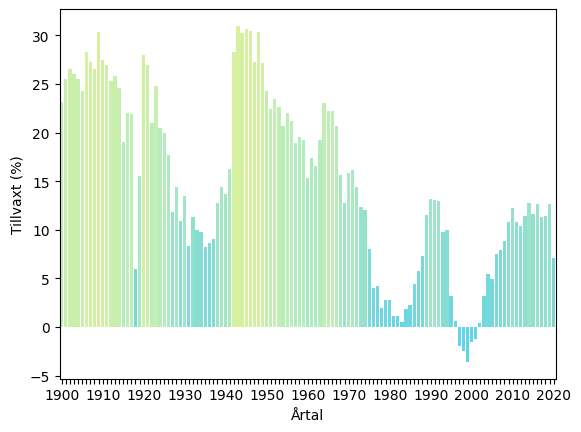

In [37]:
import pandas as pd
import data_utils as du
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("demography.csv")
df = df.set_index("Årtal", drop=True)
print(df.head(1))

tillvaxt = 100 * (df["Födda"] - df["Döda"]) / (df["Födda"] + df["Döda"])
sns.barplot(x=tillvaxt.index, y=tillvaxt,hue=tillvaxt, legend=False,  palette=du.my_palette(len(tillvaxt)), alpha=0.7)
xticks = [x if x % 10 == 0 else None for x in range(1900, 2021, 1)]
plt.gca().set_xticklabels(xticks)
plt.ylabel("Tillvaxt (%)")
plt.show()


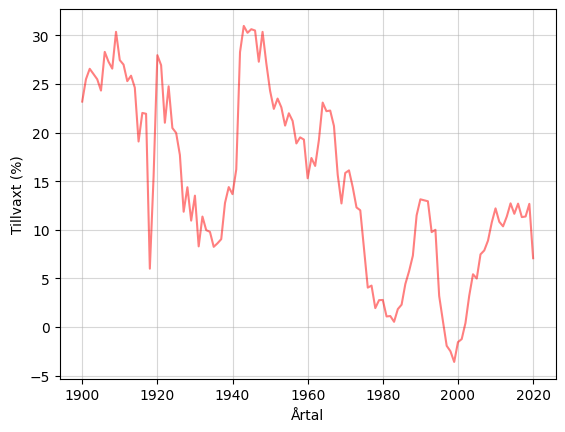

In [68]:
sns.lineplot(x=tillvaxt.index, y=tillvaxt, legend=False,  color="red", alpha=0.5)
plt.grid(True,alpha=0.5)
plt.ylabel("Tillvaxt (%)")
plt.show()

In [45]:
print("c--------------")
history = pd.read_csv("history.csv")
history.set_index("Årtal", inplace=True)
history

c--------------


,Folkmängd,Årlig tillväxt Totalt,Årlig tillväxt Promille
Årtal,,,
1570,900000,NaN,NaN
1650,1225000,4063,386
1700,1485000,5200,386
1720,1350000,−6750,−4.75
1755,1878000,15086,948
1815,2465000,9783,454
1865,4099000,32680,1022
1900,5140000,29743,648
2000,8861000,NaN,NaN


d)--------------


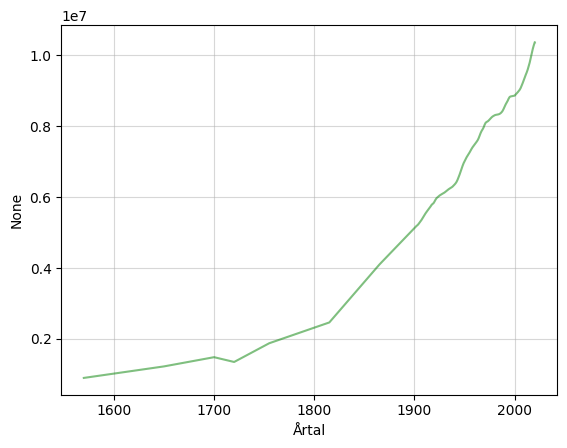

In [ ]:
print("d/e)--------------")
totalfolk = pd.concat([df["Medel- folkmängd"], history["Folkmängd"]])
totalfolk = totalfolk.sort_index()

sns.lineplot(x=totalfolk.index, y=totalfolk, color="green", alpha=0.5,)
plt.grid(True,alpha=0.5)

---
## 2. Denmark demographic data (*)

Go to the Danish-language wikipedia page [Danmarks demografi](https://da.wikipedia.org/wiki/Danmarks_demografi). 

&nbsp; a) Read in the table under "Demografiske data" into a DataFrame (*)

&nbsp; b) Clean the data and draw a graph of population against year from 1769-2020. (**)


---
## 3. Norwegian demographic data (*)

Go to Swedish-language wikipedia page [Norges demografi](https://sv.wikipedia.org/wiki/Norges_demografi). 

&nbsp; a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

&nbsp; b) You see some missing data in column "Total fertilitet". Go to the [English page](https://en.wikipedia.org/wiki/Demographics_of_Norway) and read in the data from "Vital statistics since 1900".  

&nbsp; c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet". 


---
## 4. Merge Sweden-Norway (*)

Create a population graph and a fertility graph showing Sweden and Norway.

<details>

<summary>Answer</summary>

![Fertilitet Norge och Sverige](../assets/fertilitet_sv_no.png)

![Folkmängd Norge och Sverige](../assets/folkmangd_sverige_norge.png)

</details>

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---